Dados referentes aos registros das Mortes Violentas Intencionais ocorridas no estado da Bahia, englobando ao total de vítimas para as seguintes modalidades delituosas: Homicídio doloso, Feminicídio, Roubo com resultado morte (latrocínio), Lesão corporal seguida de morte, Homicídio ocorrido em presídio, Homicídio doloso com indício de excludente de ilicitude, Homicídio doloso no trânsito.

Fonte: https://dados.ba.gov.br/dataset/morte_violenta_estado

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

Para importar os dados o Pandas usa o padrão de leitura UTF-8, mas o arquivo .csv contém caracteres que não podem ser decodificados corretamente como UTF-8. Para isso, usa-se a codificação ISO-8859-1, comum entre os arquivos CSV com caracteres especiais.

In [37]:
df = pd.read_csv('mortes_violentas_estado.csv', encoding="ISO-8859-1")
df.head(5)

,ANO,ID_REGIAO,REGIAO,ID_MUNICIPIO,MUNICIPIO,ANO.1,MES,GR_NATUREZA,QT_VITIMAS
0,2023,3,Interior,290070,Alagoinhas,2023,1,HOMICIDIO DOLOSO,1
1,2023,3,Interior,290080,Alcobaça,2023,1,HOMICIDIO DOLOSO,2
2,2023,3,Interior,290110,Amelia Rodrigues,2023,1,HOMICIDIO DOLOSO,2
3,2023,3,Interior,290130,Andarai,2023,1,HOMICIDIO DOLOSO,1
4,2023,3,Interior,290150,Anguera,2023,1,HOMICIDIO DOLOSO,1


Vamos agrupar os dados por município e calcular a soma da quantidade de vítimas para cada um deles. Em seguida, classificamos os municípios com base na soma da quantidade de vítima em ordem decrescente

In [38]:
dados_agrupados = df.groupby('MUNICIPIO')['QT_VITIMAS'].sum().reset_index()

dados_ordenados = dados_agrupados.sort_values(by='QT_VITIMAS', ascending=False)
dados_ordenados = dados_ordenados.head(10)

Criando um gráfico de barras para representar os municípios com maior número de vítimas.

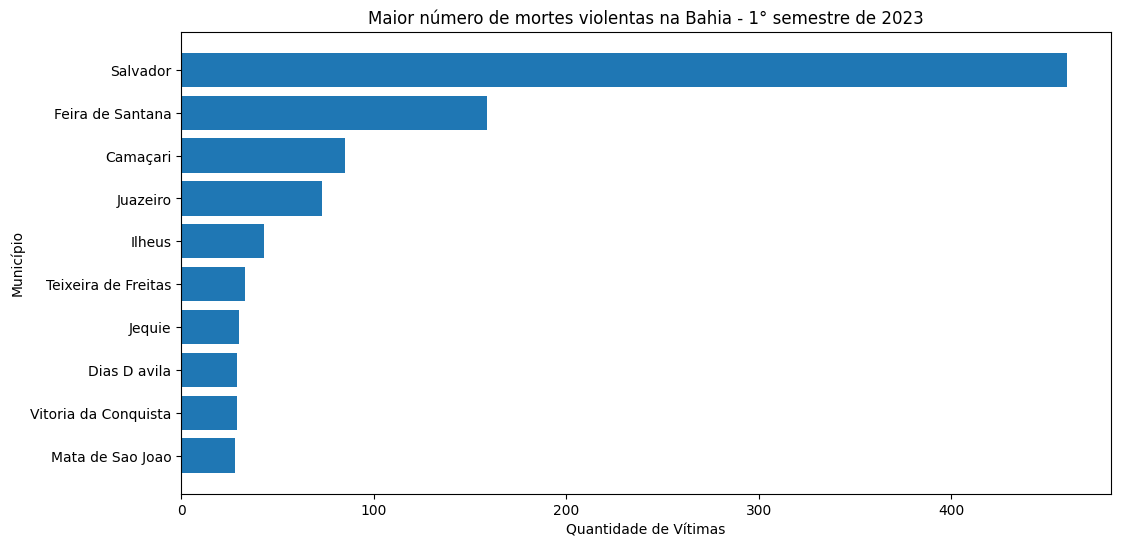

In [39]:
plt.figure(figsize=(12, 6))
plt.barh(dados_ordenados['MUNICIPIO'], dados_ordenados['QT_VITIMAS'])
plt.xlabel('Quantidade de Vítimas')
plt.ylabel('Município')
plt.title('Maior número de mortes violentas na Bahia - 1° semestre de 2023')
plt.gca().invert_yaxis()
plt.show()

O gráfico abaixo exibe a distribuição das mortes.

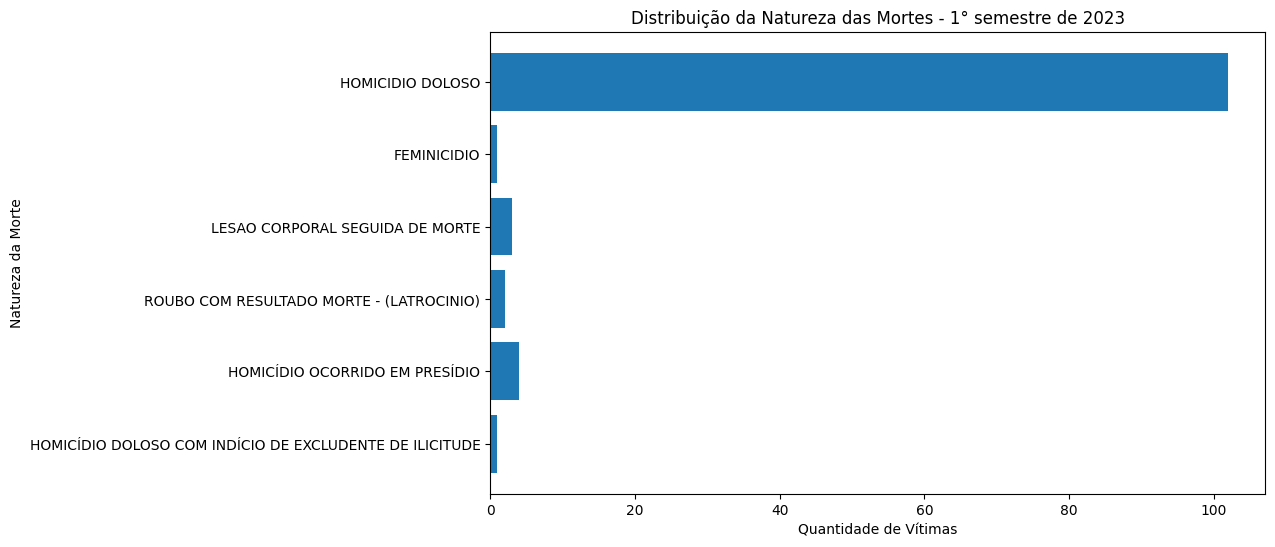

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(df['GR_NATUREZA'], df['QT_VITIMAS'])
plt.xlabel('Quantidade de Vítimas')
plt.ylabel('Natureza da Morte')
plt.title('Distribuição da Natureza das Mortes - 1° semestre de 2023')
plt.gca().invert_yaxis()
plt.show()